# Comparaison du comportement du lasso avec celui de la régression ridge

In [1]:
import pandas as pd

In [5]:
raw_data = pd.read_csv("data/prostate_dataset.txt", delimiter="\t")

In [6]:
raw_data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [7]:
X_train = raw_data.iloc[:60,1:-3]
y_train = raw_data.iloc[:60,-2]
X_test = raw_data.iloc[60:,1:-3]
y_test = raw_data.iloc[60:,-2]

## Baseline

In [8]:
from sklearn import linear_model
import numpy as np

# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)

print(baseline_error)

2.8641499657014426


## Ridge

In [13]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
alphas

array([1.00000000e-05, 1.12266777e-05, 1.26038293e-05, 1.41499130e-05,
       1.58856513e-05, 1.78343088e-05, 2.00220037e-05, 2.24780583e-05,
       2.52353917e-05, 2.83309610e-05, 3.18062569e-05, 3.57078596e-05,
       4.00880633e-05, 4.50055768e-05, 5.05263107e-05, 5.67242607e-05,
       6.36824994e-05, 7.14942899e-05, 8.02643352e-05, 9.01101825e-05,
       1.01163798e-04, 1.13573336e-04, 1.27505124e-04, 1.43145894e-04,
       1.60705282e-04, 1.80418641e-04, 2.02550194e-04, 2.27396575e-04,
       2.55290807e-04, 2.86606762e-04, 3.21764175e-04, 3.61234270e-04,
       4.05546074e-04, 4.55293507e-04, 5.11143348e-04, 5.73844165e-04,
       6.44236351e-04, 7.23263390e-04, 8.11984499e-04, 9.11588830e-04,
       1.02341140e-03, 1.14895100e-03, 1.28989026e-03, 1.44811823e-03,
       1.62575567e-03, 1.82518349e-03, 2.04907469e-03, 2.30043012e-03,
       2.58261876e-03, 2.89942285e-03, 3.25508860e-03, 3.65438307e-03,
       4.10265811e-03, 4.60592204e-03, 5.17092024e-03, 5.80522552e-03,
      

In [14]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])

In [17]:
errors

[[2.8641499657014426, 2.8641406411212396],
 [2.8641499657014426, 2.864139497307638],
 [2.8641499657014426, 2.8641382131880633],
 [2.8641499657014426, 2.8641367715523036],
 [2.8641499657014426, 2.8641351530792116],
 [2.8641499657014426, 2.8641333360778285],
 [2.8641499657014426, 2.864131296196744],
 [2.8641499657014426, 2.864129006097834],
 [2.8641499657014426, 2.8641264350900015],
 [2.8641499657014426, 2.8641235487180046],
 [2.8641499657014426, 2.864120308300897],
 [2.8641499657014426, 2.8641166704138845],
 [2.8641499657014426, 2.8641125863066903],
 [2.8641499657014426, 2.864108001250631],
 [2.8641499657014426, 2.864102853805705],
 [2.8641499657014426, 2.8640970749978707],
 [2.8641499657014426, 2.8640905873955744],
 [2.8641499657014426, 2.864083304073151],
 [2.8641499657014426, 2.8640751274473204],
 [2.8641499657014426, 2.864065947971222],
 [2.8641499657014426, 2.8640556426686388],
 [2.8641499657014426, 2.864044073488858],
 [2.8641499657014426, 2.864031085460312],
 [2.8641499657014426,

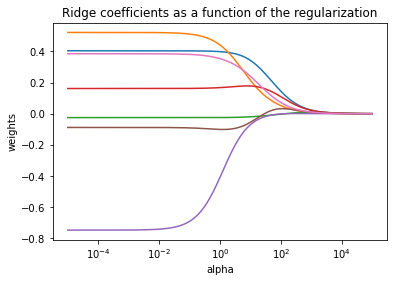

In [18]:
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

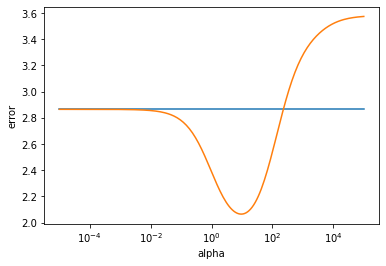

In [19]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [20]:
min(errors)

[2.8641499657014426, 2.064827060795021]

## Lasso

In [21]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

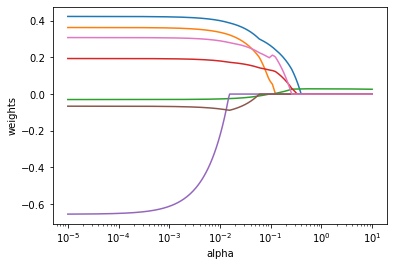

In [22]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

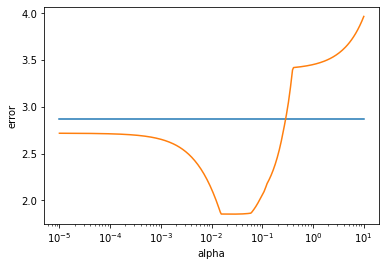

In [23]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [24]:
min(errors)

[2.8641499657014426, 1.8531561201728373]

## Quiz

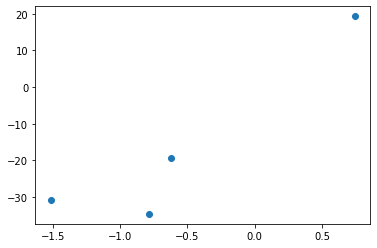

In [34]:
df = pd.DataFrame({'x' : [-0.78768, -1.51760513, 0.74416271, -0.62288928],
                   'y' : [-34.59703199, -30.79543532, 19.31018182, -19.44809959]})

ax = plt.gca()

ax.scatter(df.x, df.y)
plt.axis('tight')
plt.show()

In [37]:
df['y1'] = df.x * 52
df['y2'] = df.x * 13
df['y3'] = df.x * 26
df['y4'] = df.x * 32

df['e1_carre'] = (df.y - df.y1)**2
df['e2_carre'] = (df.y - df.y2)**2
df['e3_carre'] = (df.y - df.y3)**2
df['e4_carre'] = (df.y - df.y4)**2

In [38]:
df

,x,y,y1,y2,y3,y4,e1_carre,e2_carre,e3_carre,e4_carre
0,-0.787680,-34.597032,-40.959360,-10.239840,-20.479680,-25.205760,40.479218,593.272802,199.299627,88.195990
1,-1.517605,-30.795435,-78.915467,-19.728867,-39.457733,-48.563364,2315.537426,122.468941,75.035408,315.699295
2,0.744163,19.310182,38.696461,9.674115,19.348230,23.813207,375.827817,92.853779,0.001448,20.277233
3,-0.622889,-19.448100,-32.390243,-8.097561,-16.195121,-19.932457,167.499065,128.834734,10.581868,0.234602


In [41]:
df.sum(axis=0)/4

x            -0.546003
y           -16.382596
y1          -28.392152
y2           -7.098038
y3          -14.196076
y4          -17.472094
e1_carre    724.835881
e2_carre    234.357564
e3_carre     71.229588
e4_carre    106.101780
dtype: float64